In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Imports for model building
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
# Importing the dataset
dataset = pd.read_csv('../data.csv')

# Removing the year
dataset = dataset.drop('Year', axis='columns')

In [3]:
dataset.describe()

,Purchases (GWh),losses %,GDP per Capita,Customers,Informal sector (%),price (cedi),price ($),Installed Capacity (MW),reserve margin (MW),Suppressed demand
count,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,7954.904762,25.680476,1571.919886,2.684227e+06,24.022997,0.313714,0.118762,2721.380952,376.087108,9322.285714
std,3040.214711,1.715513,620.628489,1.338036e+06,11.554292,0.286936,0.045504,1268.499171,125.718088,3366.046481
min,4319.000000,22.800000,548.258047,9.325980e+05,3.044140,0.017000,0.024000,1652.000000,230.268293,5187.000000
25%,5546.000000,24.720000,1043.557511,1.526736e+06,16.354770,0.074000,0.082000,1730.000000,279.658537,6889.000000
50%,7406.000000,26.040000,1718.647038,2.462771e+06,25.134660,0.211000,0.124000,2165.000000,330.585366,8317.000000
75%,9416.000000,26.470000,2074.175443,4.078055e+06,29.511550,0.541000,0.147000,3656.000000,432.439024,10695.000000
max,14524.000000,29.420000,2394.137133,5.011284e+06,47.285890,0.817000,0.210000,5288.000000,678.292683,16531.000000


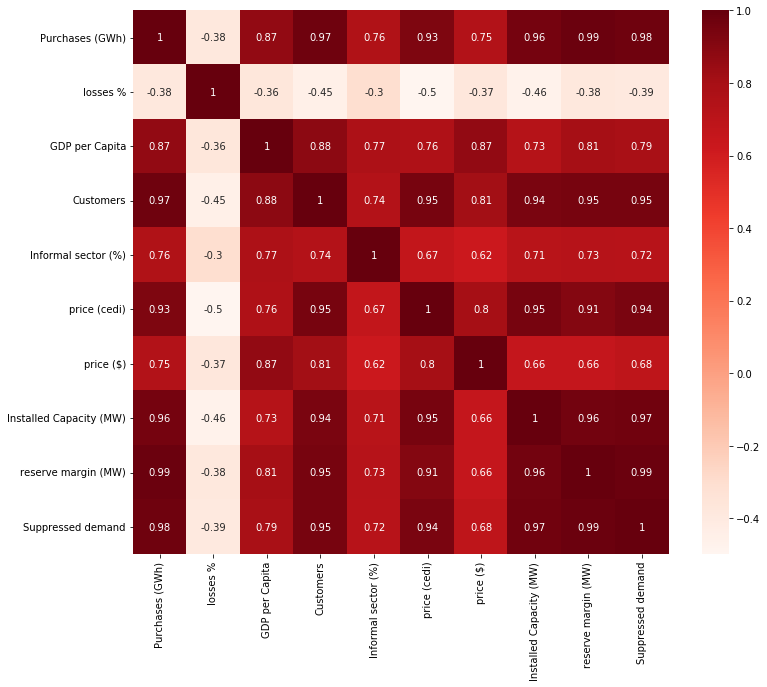

In [4]:
""" Checking the dataset for distribution of the data using the filter method (Pearson correlation)
Only 
"""

plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
# Correlation with output variable
cor_target = abs(cor["Suppressed demand"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Purchases (GWh)            0.976194
GDP per Capita             0.794083
Customers                  0.949877
Informal sector (%)        0.724808
price (cedi)               0.935968
price ($)                  0.684988
Installed Capacity (MW)    0.968200
reserve margin (MW)        0.985001
Suppressed demand          1.000000
Name: Suppressed demand, dtype: float64

In [6]:
dataset.corr()

,Purchases (GWh),losses %,GDP per Capita,Customers,Informal sector (%),price (cedi),price ($),Installed Capacity (MW),reserve margin (MW),Suppressed demand
Purchases (GWh),1.000000,-0.377047,0.866437,0.972162,0.759600,0.928484,0.745765,0.956843,0.985147,0.976194
losses %,-0.377047,1.000000,-0.364611,-0.450007,-0.301647,-0.498189,-0.374149,-0.464881,-0.377764,-0.390194
GDP per Capita,0.866437,-0.364611,1.000000,0.884798,0.769952,0.761322,0.869579,0.734043,0.806147,0.794083
Customers,0.972162,-0.450007,0.884798,1.000000,0.742113,0.953005,0.814842,0.941098,0.950449,0.949877
Informal sector (%),0.759600,-0.301647,0.769952,0.742113,1.000000,0.668312,0.624957,0.714392,0.728317,0.724808
price (cedi),0.928484,-0.498189,0.761322,0.953005,0.668312,1.000000,0.801045,0.950930,0.906401,0.935968
price ($),0.745765,-0.374149,0.869579,0.814842,0.624957,0.801045,1.000000,0.655076,0.656199,0.684988
Installed Capacity (MW),0.956843,-0.464881,0.734043,0.941098,0.714392,0.950930,0.655076,1.000000,0.964818,0.968200
reserve margin (MW),0.985147,-0.377764,0.806147,0.950449,0.728317,0.906401,0.656199,0.964818,1.000000,0.985001
Suppressed demand,0.976194,-0.390194,0.794083,0.949877,0.724808,0.935968,0.684988,0.968200,0.985001,1.000000


In [7]:
improved_data = dataset.drop('losses %', axis='columns')
improved_data = dataset.drop('price ($)', axis='columns')

In [8]:
improved_data

,Purchases (GWh),losses %,GDP per Capita,Customers,Informal sector (%),price (cedi),Installed Capacity (MW),reserve margin (MW),Suppressed demand
0,4319,27.23,548.258047,932598,9.87344,0.017,1652,254.853658,6889
1,4530,26.47,570.639605,1022847,11.00198,0.034,1652,261.219512,7128
2,4709,26.42,646.038719,1109357,8.71163,0.065,1652,269.341463,6773
3,4922,26.33,780.267565,1245935,3.04414,0.071,1652,249.146342,5187
4,5291,27.01,885.637507,1400258,17.07084,0.074,1730,230.268293,5299
5,5546,26.58,1043.557511,1526736,23.43980,0.073,1730,290.853658,5932
6,5760,24.76,1207.207961,1643786,28.91935,0.078,1730,305.780488,7224
7,5640,24.20,1427.032007,1793245,11.15367,0.097,1935,279.658537,6270
8,6328,25.58,1602.504302,2001408,25.13466,0.148,1981,300.073171,7219
9,6618,26.04,1422.601095,2271829,24.34180,0.148,1970,312.365854,7454


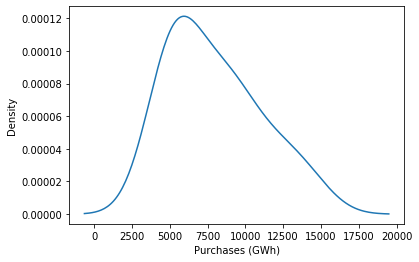

In [12]:
# Visualizing the data for improvement: preparing the data for training
sns.kdeplot(improved_data['Purchases (GWh)'])

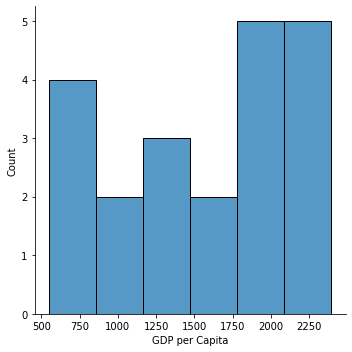

In [17]:
sns.displot(improved_data['GDP per Capita'])

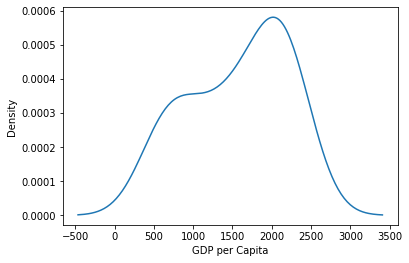

In [13]:
sns.kdeplot(improved_data['GDP per Capita'])

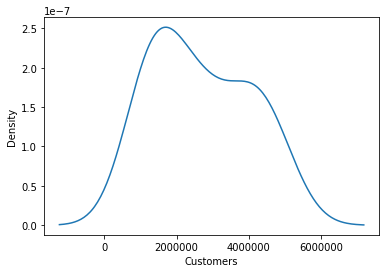

In [14]:
sns.kdeplot(improved_data['Customers'])

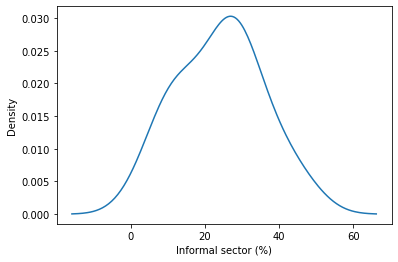

In [15]:
sns.kdeplot(improved_data['Informal sector (%)'])

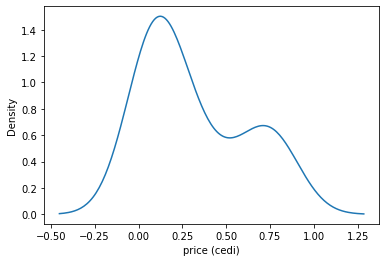

In [16]:
sns.kdeplot(improved_data['price (cedi)'])